---

## Market Analysis

### Project discription

You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?
You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.


 Presentation:  <https://drive.google.com/file/d/15ix6rv0ZC6baaEkpsBO0OKRMDCF7uAdO/view?usp=sharing>

## Table Of Contents

* [Step 1. Preparing the data and studying the general information](#chapter1)
* [Step 2. Data analysis](#chapter2)
    * [Investigate the proportions of the various types of establishments. Plot a graph. ](#section_1_1)
    * [ Investigate the proportions of chain and nonchain establishments. Plot a graph. ](#section_1_2)
    * [Which type of establishment is typically a chain? ](#section_1_3)
    * [What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats? ](#section_1_4)
    * [Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs. ](#section_1_5)
    * [APut the data on street names from the address column in a separate column. ](#section_1_6)
    * [Plot a graph of the top ten streets by number of restaurants. ](#section_1_7)
    * [Find the number of streets that only have one restaurant. ](#section_1_8)
    * [For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see? ](#section_1_9)
* [Conclution](#chapter3)

In [1]:
import math
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import warnings
import plotly.express as px
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib import lines
import re
warnings.filterwarnings ("ignore")

%matplotlib inline


In [2]:
local_path1 = '/Users/yoni/Pictures/jupyter/How to Tell a Story Using Data/rest_data_us.csv'


## Step 1. Preparing the data and studying the general information
<a class="anchor" id="chapter1"></a>

In [3]:
rest_data_500 = pd.read_csv(local_path1, nrows=500)

In [4]:
rest_data_500.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           500 non-null    int64 
 1   object_name  500 non-null    object
 2   address      500 non-null    object
 3   chain        500 non-null    bool  
 4   object_type  500 non-null    object
 5   number       500 non-null    int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 113.8 KB


In [5]:
rest_data_500.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [6]:
rest_data_500['object_type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

I will change the type for the 'object_type' column to 'category'

In [7]:

rest_data = pd.read_csv(local_path1, dtype={'object_type':'category'})

In [8]:
rest_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   object  
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: category(1), int64(2), object(3)
memory usage: 1.8 MB


In [9]:
rest_data.tail()

,id,object_name,address,chain,object_type,number
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


I can see that I have a couple of missing values in the 'chain' column

In [10]:
rest_data['chain'].unique()

array([False, True, nan], dtype=object)

In [11]:
#rest_data.loc[rest_data['chain']==NaN]
rest_missing_list= rest_data['chain'].isnull()
rest_missing=rest_data[rest_missing_list]
rest_missing

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


I found this 3 rows with missing values. This is just 3 out of 9651 so there is no problem with deleting them.

In [12]:
rest_data.dropna(inplace=True)
rest_data.reset_index()
rest_data['chain'].unique()

array([False, True], dtype=object)

In [13]:
# getting the column values to be lower case
rest_data['object_name']=rest_data['object_name'].str.lower() 
rest_data['address']=rest_data['address'].str.lower()

In [14]:
#Looking for duplicates
rest_data[rest_data.duplicated(['id','address'],keep=False)] 

,id,object_name,address,chain,object_type,number


In [15]:
rest_data[rest_data.duplicated(['id','object_name'],keep=False)] 

,id,object_name,address,chain,object_type,number


In [16]:
rest_data[rest_data.duplicated(['object_name','address'],keep=False)] 

,id,object_name,address,chain,object_type,number


In [17]:
rest_data.describe(include='all')

,id,object_name,address,chain,object_type,number
count,9648.000000,9648,9648,9648,9648,9648.000000
unique,NaN,8669,8510,2,6,NaN
top,NaN,the coffee bean & tea leaf,3607 trousdale pkwy,False,Restaurant,NaN
freq,NaN,47,11,5972,7253,NaN
mean,16610.056385,NaN,NaN,NaN,NaN,43.703566
std,2786.049701,NaN,NaN,NaN,NaN,47.627252
min,11786.000000,NaN,NaN,NaN,NaN,1.000000
25%,14197.750000,NaN,NaN,NaN,NaN,14.000000
50%,16609.500000,NaN,NaN,NaN,NaN,27.000000
75%,19021.250000,NaN,NaN,NaN,NaN,46.000000


In [18]:
rest_data.query('address == "3607 trousdale pkwy"')

,id,object_name,address,chain,object_type,number
457,12243,usc main kitchen-basement,3607 trousdale pkwy,True,Restaurant,227
462,12248,traditions pub,3607 trousdale pkwy,False,Restaurant,197
480,12266,panda express,3607 trousdale pkwy,False,Fast Food,40
858,12644,moreton figs restaurant/bar,3607 trousdale pkwy,True,Bar,107
863,12649,verde,3607 trousdale pkwy,False,Restaurant,39
888,12674,california pizza kitchen,3607 trousdale pkwy,True,Pizza,44
2610,14396,the coffee bean & tea leaf,3607 trousdale pkwy,True,Cafe,43
3268,15054,the habit burger grill,3607 trousdale pkwy,False,Fast Food,43
6311,18097,lemonade,3607 trousdale pkwy,True,Restaurant,138
7698,19484,lemonades,3607 trousdale pkwy,True,Restaurant,111


I see two restaurants (index 6311 and 7698) that have the same address and share a super similar name, I suspect these are duplicates so I will keep the one wwith the leter 'id' and get rid of the other one.

In [19]:
rest_data=rest_data.drop(rest_data.index[6311]).reset_index(drop=True)


In [20]:
rest_data.query('address == "3607 trousdale pkwy"')

,id,object_name,address,chain,object_type,number
457,12243,usc main kitchen-basement,3607 trousdale pkwy,True,Restaurant,227
462,12248,traditions pub,3607 trousdale pkwy,False,Restaurant,197
480,12266,panda express,3607 trousdale pkwy,False,Fast Food,40
858,12644,moreton figs restaurant/bar,3607 trousdale pkwy,True,Bar,107
863,12649,verde,3607 trousdale pkwy,False,Restaurant,39
888,12674,california pizza kitchen,3607 trousdale pkwy,True,Pizza,44
2610,14396,the coffee bean & tea leaf,3607 trousdale pkwy,True,Cafe,43
3268,15054,the habit burger grill,3607 trousdale pkwy,False,Fast Food,43
7695,19484,lemonades,3607 trousdale pkwy,True,Restaurant,111
7753,19542,coffee bean & tea leaf,3607 trousdale pkwy,True,Cafe,31


As I progressed with this analisis a came across some more duplicates just in the object_name column, mainly the same name followed with a "#" and a number. I'll make another column fr name and earase this from the end of the name.

In [21]:
rest_data['name_clean'] = rest_data['object_name'].str.split(' #').str[0] # Removing averything after the # sign


rest_data['name_clean']=rest_data['name_clean'].str.split(' 0123456789').str[0] #removing numbers at beginning of str
rest_data.query('name_clean=="starbucks"').head(10)

,id,object_name,address,chain,object_type,number,name_clean
938,12724,starbucks,1401 s alameda st,True,Cafe,18,starbucks
2544,14330,starbucks #24164,700 s 7th st ste lg320,True,Cafe,39,starbucks
3323,15109,starbucks,400 world way,True,Cafe,27,starbucks
3514,15300,starbucks #25813,8400 lincoln blvd,True,Cafe,35,starbucks
3713,15499,starbucks,300 world way # 335,True,Cafe,37,starbucks
3820,15606,starbucks #28051,1742 s la cienega blvd,True,Cafe,142,starbucks
4002,15788,starbucks #22916,6290 w sunset blvd ste c,True,Cafe,35,starbucks
4166,15952,starbucks,600 world way # 681,True,Cafe,21,starbucks
4326,16112,starbucks #22525,3150 wilshire blvd # 112,True,Cafe,49,starbucks
4776,16562,starbucks #17331,600 9th st,True,Cafe,44,starbucks


In [22]:
before = rest_data['object_name'].nunique()
after = rest_data['name_clean'].nunique()

print('Before the name cleanning we had: {}, unique erestaurants \nNow we have: {}, unique restaurants'.format(before,after))

Before the name cleanning we had: 8669, unique erestaurants 
Now we have: 7894, unique restaurants


## Step 2. Data analysis
<a class="anchor" id="chapter2"></a>

### Investigate the proportions of the various types of establishments. Plot a graph.
<a class="anchor" id="section_1_1"></a>

In [23]:
rest_type = rest_data.groupby('object_type',as_index=False).agg({'name_clean':'nunique'})
rest_type

,object_type,name_clean
0,Bakery,252
1,Bar,274
2,Cafe,231
3,Fast Food,595
4,Pizza,197
5,Restaurant,6353


In [24]:
rest_chain = rest_data.query('chain==True')
rest_not_chain = rest_data.query('chain==False')

rest_chain_type = rest_chain.groupby('object_type',as_index=False).agg({'name_clean':'nunique'})

rest_not_chain_type = rest_not_chain.groupby('object_type',as_index=False).agg({'name_clean':'nunique'})

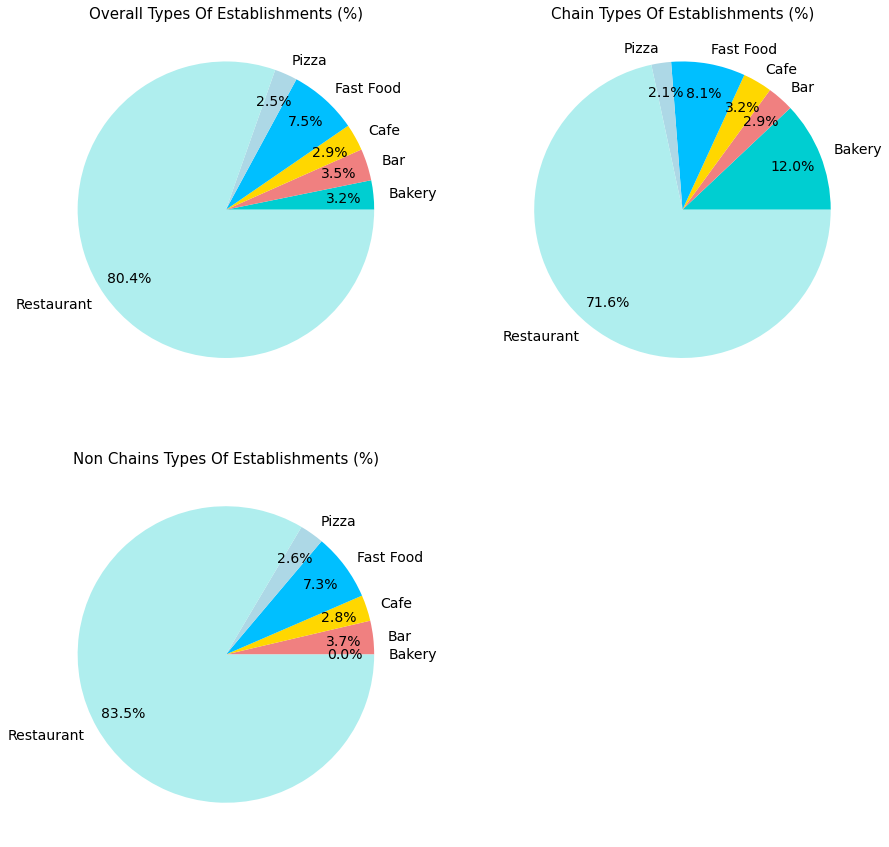

In [25]:
colors = ['darkturquoise','lightcoral' , 'gold','deepskyblue', 'lightblue','paleturquoise']


plt.figure(figsize=(15,15))

plt.subplot(221)
plt.pie(rest_type['name_clean'],labels=rest_type['object_type'],
        autopct='%0.1f%%',textprops={'fontsize': 14},colors=colors,pctdistance=.8)
plt.title('Overall Types Of Establishments (%)', fontdict={'size':15})

plt.subplot(222)
plt.pie(rest_chain_type['name_clean'],labels=rest_chain_type['object_type'],
        autopct='%0.1f%%',textprops={'fontsize': 14},colors=colors,pctdistance=.8)
plt.title('Chain Types Of Establishments (%)', fontdict={'size':15})

plt.subplot(223)
plt.pie(rest_not_chain_type['name_clean'],labels=rest_not_chain_type['object_type'],
        autopct='%0.1f%%',textprops={'fontsize': 14},colors=colors,pctdistance=.8)
plt.title('Non Chains Types Of Establishments (%)', fontdict={'size':15})



plt.show()

In the pie charts above we can see that the most common type of restourant is defined as a restaurant and it is by far the most common.

When we look at chains and non chains we can see they are prety similar, the biggest difference being that non chains don't have any Bakeries and Bakeries are 12% of all the chains, the % of places that are considered "restaurants" in the non chain segment is higher. 83.5 and 71.6% in the chains. This is pretty much the difference the bakeries make.



### Investigate the proportions of chain and nonchain establishments. Plot a graph.
<a class="anchor" id="section_1_2"></a>

In [26]:
rest_chain_grouped = rest_data.groupby('chain',as_index=False).agg({'id':'nunique'})
rest_chain_grouped['chain']= rest_chain_grouped['chain'].replace({False:'non_chain',True:'chain'})
rest_chain_grouped

,chain,id
0,non_chain,5972
1,chain,3675


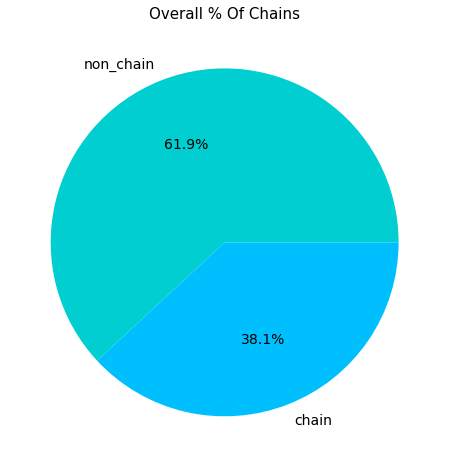

In [27]:
plt.figure(figsize=(8,8))


plt.pie(rest_chain_grouped['id'],labels=rest_chain_grouped\
        ['chain'],autopct='%0.1f%%',textprops={'fontsize': 14},colors=(colors[0],colors[3]))
plt.title('Overall % Of Chains', fontdict={'size':15})

plt.show()

We can see that most places are non chains, The chains are only 38.1% of all places.


### Which type of establishment is typically a chain?
<a class="anchor" id="section_1_3"></a>

We sort of answered this question with one of the pie charts in the "nvestigate the proportions of the various types of establishments." part. But I'll plot a different kind of plot now and see if the results will be visually clearer.

In [28]:
rest_chain_grouped_2 = rest_chain.groupby('object_type',as_index=False).agg({'object_name':'nunique'}
                                                                           ).sort_values(by='object_name',ascending=False)
rest_chain_grouped_2

,object_type,object_name
5,Restaurant,1730
3,Fast Food,415
0,Bakery,255
2,Cafe,175
4,Pizza,99
1,Bar,61


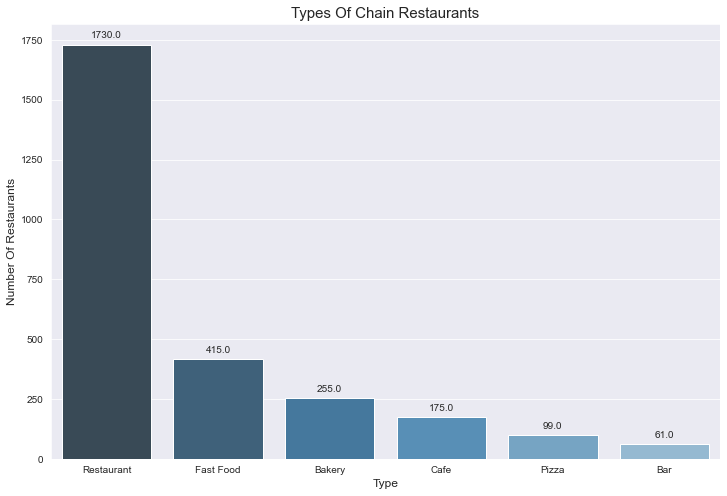

In [29]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

ax=sns.barplot(x="object_type", y="object_name",
               data=rest_chain_grouped_2,palette="Blues_d",order=rest_chain_grouped_2['object_type'])




for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
    
plt.title('Types Of Chain Restaurants', fontdict={'size':15})
plt.ylabel("Number Of Restaurants",fontdict={'size':12})
plt.xlabel("Type",fontdict={'size':12})

plt.show()

We can see that most 'chain' restaurants define themselves as a 'restaurant', That is the very big majority 1730(63.3% as we saw before). Long way afret that we have 'fast food' with 415 places, That is less than a third. The least places are defines as 'bars', I think people prefer to go to a neighborhood bar where they feel like it has a uniqueness and sense of comunity and are less inclined to go to a chain bar that doesnt feel special.

In [30]:
kind_grouped = rest_data.groupby(['object_type','chain']).agg({'id':'nunique'}).reset_index()
kind_grouped

,object_type,chain,id
0,Bakery,False,0
1,Bakery,True,283
2,Bar,False,215
3,Bar,True,77
4,Cafe,False,169
5,Cafe,True,266
6,Fast Food,False,461
7,Fast Food,True,605
8,Pizza,False,166
9,Pizza,True,153


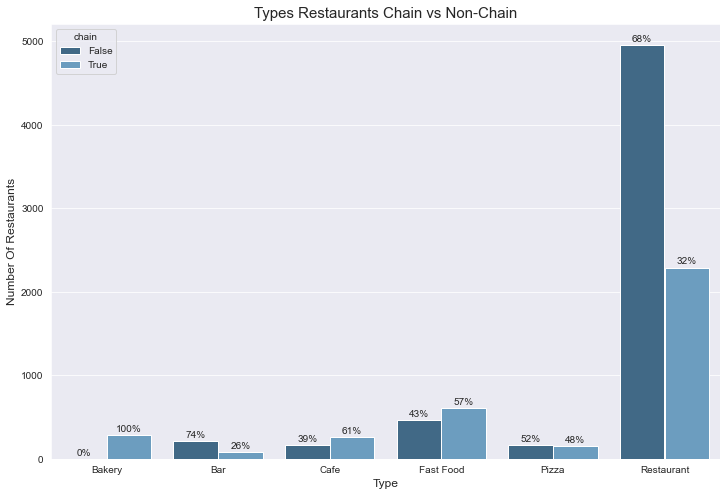

In [31]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

ax=sns.barplot(x="object_type", y="id",hue='chain',
               data=kind_grouped,palette="Blues_d",ci=None)


# for p in ax.patches:
#     ax.annotate(format(p.get_height()),
#                 (p.get_x() + p.get_width() / 2, p.get_height()), 
#                 ha = 'center', va = 'center', 
#                 xytext = (0, 9), 
#                 textcoords = 'offset points')





bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")


plt.title('Types Restaurants Chain vs Non-Chain', fontdict={'size':15})
plt.ylabel("Number Of Restaurants",fontdict={'size':12})
plt.xlabel("Type",fontdict={'size':12})

plt.show()

The graph above shows us what of precentage of every type of restaurant is chain and what is a non-chain. We can clearly see that most restaurants are non chains, but we can see that most of the cafes are chains (61%). Here again we see that there are no non-chain bakeries. Another interesting thing to note is that mosts bars are non-chain, again this makes a lot of sense having that bars are a place that usually has a unique feel and a comunnity around it.

### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
<a class="anchor" id="section_1_4"></a>

In [32]:
chain_grouped= rest_chain.groupby(['name_clean']).agg({'id':'count','number':'mean'})\
.sort_values(by='id',ascending=False).reset_index()

chain_grouped = chain_grouped.rename(columns=({'id':'number_of_branches'}))
chain_grouped.head()

,name_clean,number_of_branches,number
0,subway,113,16.592920
1,starbucks coffee,87,24.850575
2,mcdonald's,80,94.512500
3,jack in the box,53,65.981132
4,the coffee bean & tea leaf,51,26.235294


In [33]:
chain_grouped = pd.merge(chain_grouped,rest_chain[['name_clean','object_type']]\
                         .drop_duplicates('name_clean'), how='left',on='name_clean')
chain_grouped.head()

,name_clean,number_of_branches,number,object_type
0,subway,113,16.592920,Fast Food
1,starbucks coffee,87,24.850575,Cafe
2,mcdonald's,80,94.512500,Fast Food
3,jack in the box,53,65.981132,Restaurant
4,the coffee bean & tea leaf,51,26.235294,Cafe


In [34]:
cafe = chain_grouped.query('object_type=="Cafe"')
cafe

,name_clean,number_of_branches,number,object_type
1,starbucks coffee,87,24.850575,Cafe
4,the coffee bean & tea leaf,51,26.235294,Cafe
8,starbucks,30,33.633333,Cafe
31,blue bottle coffee,9,21.888889,Cafe
55,coffee bean and tea leaf,5,18.200000,Cafe
...,...,...,...,...
1798,marie's coffee and deli,1,36.000000,Cafe
1813,lollicup tea & coffee zone,1,13.000000,Cafe
1888,groundwork coffee -the grove (kiosk),1,10.000000,Cafe
1892,healing coffee roasters,1,11.000000,Cafe


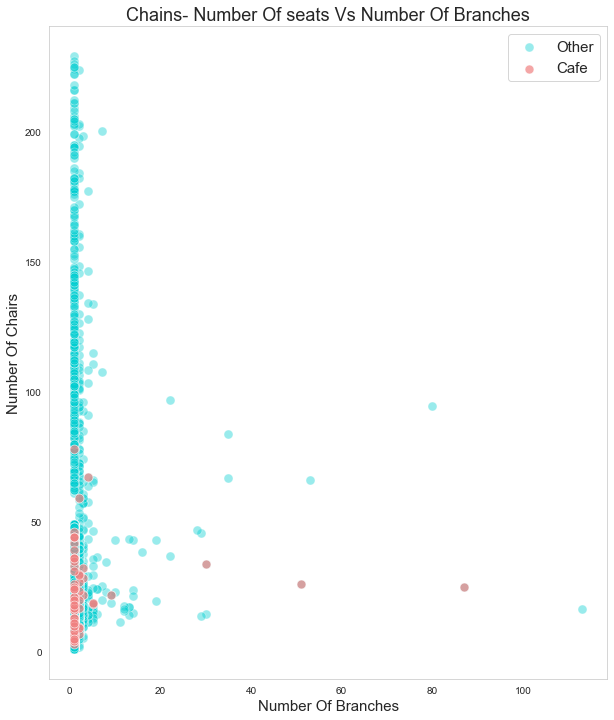

In [35]:
plt.figure(figsize=(10,12))
sns.set_style('whitegrid')
ax= sns.scatterplot(data=chain_grouped,x='number_of_branches',y='number',s=80\
                    ,alpha=0.4,color= colors[0],label='Other')




ax= sns.scatterplot(data=cafe,x='number_of_branches',y='number',s=80\
                    ,alpha=0.7,color=colors[1],label='Cafe')

plt.title('Chains- Number Of seats Vs Number Of Branches',fontdict={'size':18})
plt.ylabel("Number Of Chairs",fontdict={'size':15})
plt.xlabel("Number Of Branches",fontdict={'size':15})




plt.legend(fontsize=15)
plt.grid()
plt.show()

We can see in this graph that it is most common for chains to have a lot of seats with a few number of branches (establishments), In fact most chains have less than 10 branches and more than 50 seats.

We can see that Cafes tipically dont have more than 50 seats and a few number of branches.

### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
<a class="anchor" id="section_1_5"></a>

In [36]:
rest_seats_grouped = rest_data.groupby('object_type',as_index=False
                                     ).agg({'number':'mean'}).sort_values(by='number',ascending=False)
rest_seats_grouped

,object_type,number
5,Restaurant,48.036404
1,Bar,44.767123
3,Fast Food,31.837711
4,Pizza,28.545455
2,Cafe,25.000000
0,Bakery,21.773852


In [37]:
chain_seats_grouped=rest_chain.groupby('object_type',as_index=False
                                     ).agg({'number':'mean'}).sort_values(by='number',ascending=False)
chain_seats_grouped

,object_type,number
5,Restaurant,44.815364
1,Bar,40.259740
3,Fast Food,38.089256
2,Cafe,25.917293
4,Pizza,25.529412
0,Bakery,21.773852


In [38]:
non_chain_seats_grouped=rest_not_chain.groupby('object_type',as_index=False
                                     ).agg({'number':'mean'}).sort_values(by='number',ascending=False)
non_chain_seats_grouped

,object_type,number
5,Restaurant,49.523886
1,Bar,46.381395
4,Pizza,31.325301
3,Fast Food,23.633406
2,Cafe,23.556213
0,Bakery,NaN


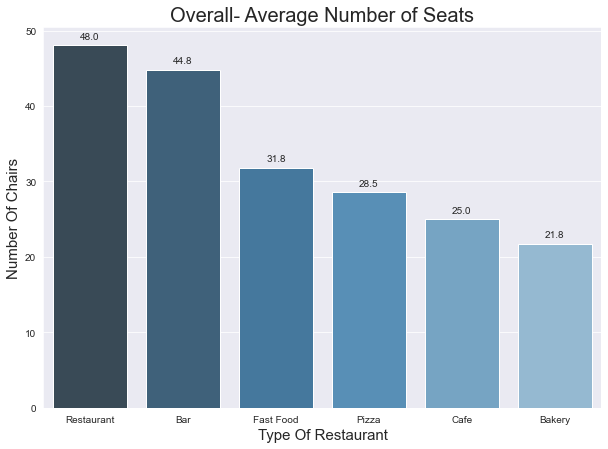

In [39]:
# Overall plot
plt.figure(figsize=(10, 7))
sns.set_style('darkgrid')

ax=sns.barplot(x=rest_seats_grouped.object_type, y=rest_seats_grouped.number,palette="Blues_d",ci=None,
               order = rest_seats_grouped['object_type'])

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Overall- Average Number of Seats',fontdict={'size':20})    
plt.ylabel("Number Of Chairs",fontdict={'size':15})
plt.xlabel("Type Of Restaurant",fontdict={'size':15})


plt.show()

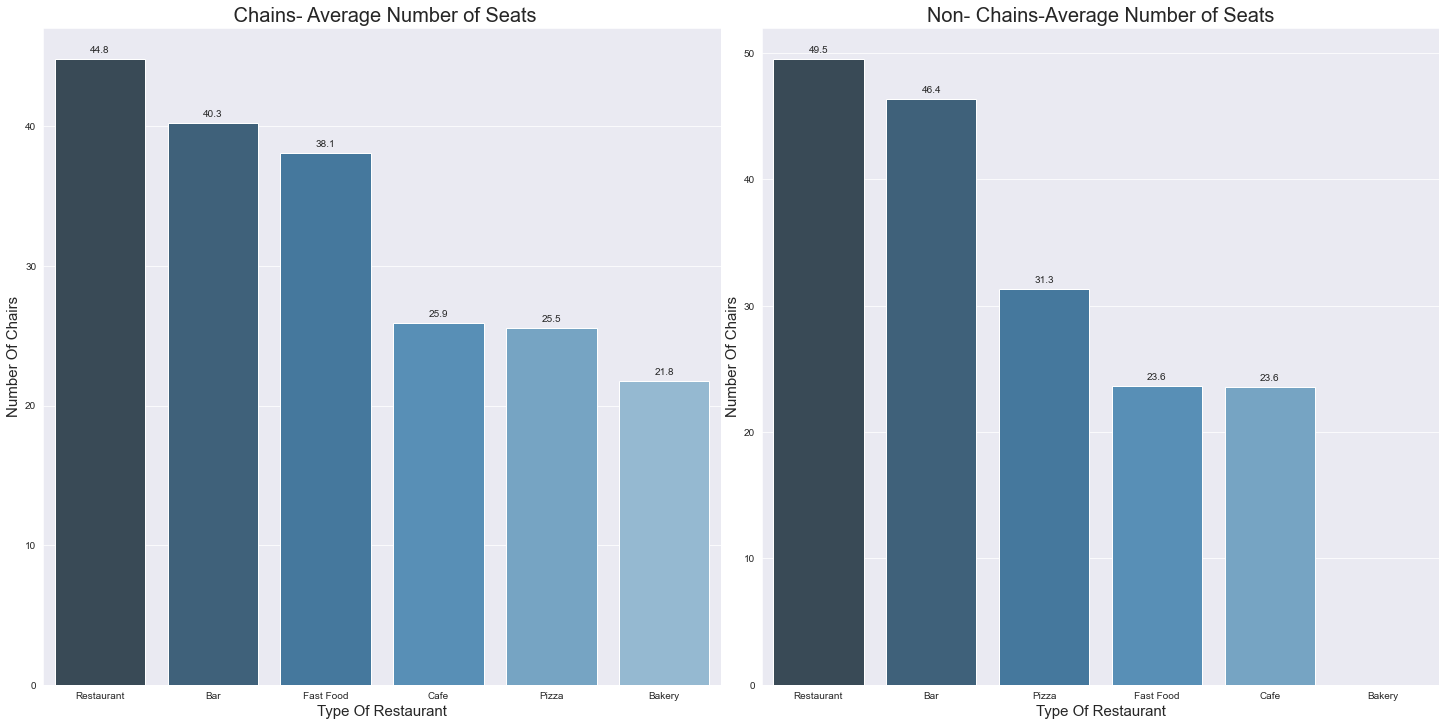

In [40]:
plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')


# Chain plot
plt.subplot(121)
ax=sns.barplot(x=chain_seats_grouped.object_type, y=chain_seats_grouped.number,palette="Blues_d",ci=None,
               order = chain_seats_grouped['object_type'])

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title(' Chains- Average Number of Seats',fontdict={'size':20})    
plt.ylabel("Number Of Chairs",fontdict={'size':15})
plt.xlabel("Type Of Restaurant",fontdict={'size':15})



# non chain plot
plt.subplot(122)
ax=sns.barplot(x=non_chain_seats_grouped.object_type, y=non_chain_seats_grouped.number,palette="Blues_d",ci=None,
               order = non_chain_seats_grouped['object_type'])

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Non- Chains-Average Number of Seats',fontdict={'size':20})    
plt.ylabel("Number Of Chairs",fontdict={'size':15})
plt.xlabel("Type Of Restaurant",fontdict={'size':15})





plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In the graphs above we can see the average number of seats overall, In chains and in non chains.

Allways the most seats are in a type 'restaurant' and the second is a 'bar', At the bottom we allways see the bakery.

For number 3 we see in the overall as in the chains "fast food", But in the non chain we see 'pizza' but it is relatively a long way down.

The restaurant and bar are places that people come to eat and drink together so naturally they will have more seats to accomedate the groups of people that are comming together. The rest of the places are much more in the style of grab and go, Lots of people take away and even if they seats it is usually for a short time, So there might be less seats but the change of cotumers will be quicker.



### Put the data on street names from the address column in a separate column.
<a class="anchor" id="section_1_6"></a>


In [41]:
rest_data['street_name']=rest_data['address'].str.split('#').str[0] # Removing averything after the # sign

In [42]:
rest_data['street_name']=rest_data['street_name'].str.split(' ste ').str[0] # removing everithing after ste

In [43]:
rest_data['street_name']=rest_data['street_name'].str.lstrip('0123456789') #removing numbers at beginning of str

In [44]:
rest_data.sample(10)

,id,object_name,address,chain,object_type,number,name_clean,street_name
2449,14235,monarca pasta and grill,2703 s vermont ave,False,Restaurant,25,monarca pasta and grill,s vermont ave
5233,17019,little caesars,3476 e whittier blvd 112,True,Restaurant,1,little caesars,e whittier blvd 112
5235,17021,"simple delicious, a creole southern cusine",4641 w washington blvd,True,Restaurant,21,"simple delicious, a creole southern cusine",w washington blvd
5806,17592,mcdonald's #24834,1311 w washington blvd,True,Restaurant,64,mcdonald's,w washington blvd
8771,20561,tinder's pizza,235 n maclay ave,False,Pizza,15,tinder's pizza,n maclay ave
2763,14549,howlin ray's,727 n broadway # 128,False,Restaurant,18,howlin ray's,n broadway
9482,21272,el buen sabor,4306 n figueroa,True,Restaurant,46,el buen sabor,n figueroa
626,12412,subway #40374,539 e florence ave # #b,True,Fast Food,12,subway,e florence ave
1714,13500,bronzed aussie,714 s los angeles st ste a,False,Restaurant,19,bronzed aussie,s los angeles st
8761,20551,chipotle mexican grill #3119,1122 w 6th st # 101,True,Restaurant,19,chipotle mexican grill,w 6th st


### Plot a graph of the top ten streets by number of restaurants.
<a class="anchor" id="section_1_7"></a>

In [45]:
pop_street =rest_data.groupby('street_name',as_index=False).agg(
    {'id':'nunique'}).sort_values(by='id',ascending=False).head(10)

pop_street

,street_name,id
1165,w sunset blvd,335
1154,w pico blvd,314
1217,wilshire blvd,287
371,hollywood blvd,203
936,santa monica blvd,191
1147,w olympic blvd,190
1021,w 3rd st,183
902,s western ave,181
887,s vermont ave,180
748,s figueroa st,176


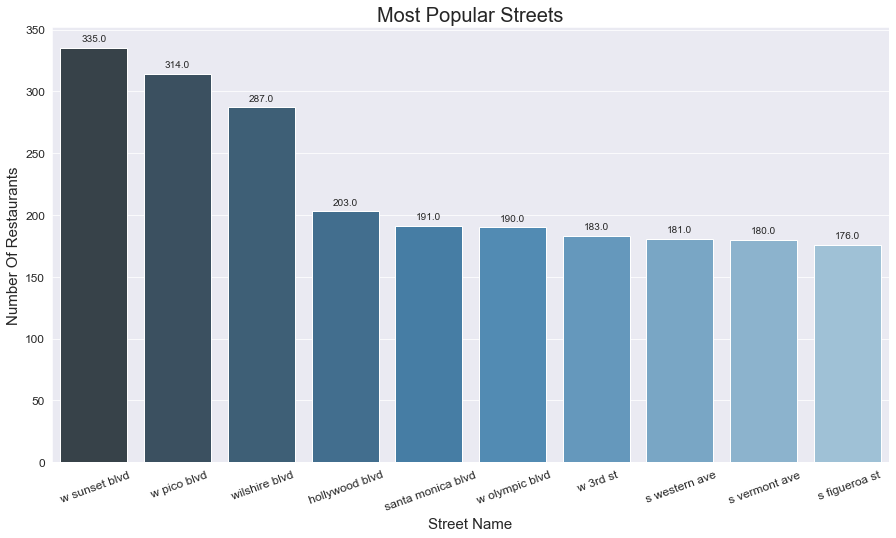

In [46]:
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')

ax=sns.barplot(x=pop_street.street_name, y=pop_street.id,palette="Blues_d",ci=None,
               order = pop_street['street_name'])

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Most Popular Streets',fontdict={'size':20})    
plt.ylabel("Number Of Restaurants",fontdict={'size':15})
plt.xlabel("Street Name",fontdict={'size':15})
plt.xticks(rotation=20)
ax.tick_params(axis='both', which='major', labelsize=12)


plt.show()



"West Sunset blvd" is the most popular street with 335 places, Close behind it is "West Pico blvd" with 314 places and third is "Wilshire blvd" with 287 places. the rest 7 places are far behind and have similar numbers to each other ranging from 203 to 176 restaurants on each street.
these places are most probably in the city center or in the buisness district, this is why they have so many places in them.

In [47]:
pop_street_list = (pop_street['street_name'].to_list())
pop_street_list

[' w sunset blvd',
 ' w pico blvd',
 ' wilshire blvd',
 ' hollywood blvd',
 ' santa monica blvd',
 ' w olympic blvd',
 ' w 3rd st',
 ' s western ave',
 ' s vermont ave',
 ' s figueroa st']

In [48]:
pop_street_rest_num= len(rest_data.loc[rest_data['street_name'].isin(pop_street_list)].reset_index(drop=True))

rest_num = len(rest_data)

street_number = rest_data['street_name'].nunique()

In [49]:
print('10 streets have {:.2%} of all restaurants'.format(pop_street_rest_num/rest_num))

10 streets have 23.22% of all restaurants


### Find the number of streets that only have one restaurant.
<a class="anchor" id="section_1_8"></a>

In [50]:
list_street =rest_data.groupby('street_name',as_index=False).agg(
    {'id':'nunique'}).sort_values(by='id',ascending=False)

lonely_street= len(list_street.query('id==1'))
retio_lonely = lonely_street/rest_data['street_name'].nunique()
print('The number of streets that have only 1 restaurant is: {}, Which is {:.1%} of all streets with restaurants'.format(lonely_street,retio_lonely))

The number of streets that have only 1 restaurant is: 746, Which is 57.9% of all streets with restaurants


### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?
<a class="anchor" id="section_1_9"></a>

In [51]:
print('Average number of restaurants in a street is {:.1f}'.format(list_street['id'].mean()))

Average number of restaurants in a street is 7.5


I think i'll slice the data and set the "a lot of restaurants" bar at 50+ 

In [52]:
pop_50_streets= list_street.query('id>=50')

In [53]:
print('Number of streets with 50 or more restaurants is {}'.format(len(pop_50_streets)))

Number of streets with 50 or more restaurants is 45


In [54]:
street_list = (pop_50_streets['street_name']).to_list()

In [55]:
pop_street_data= rest_data.loc[rest_data['street_name'].isin(street_list)].reset_index(drop=True)
pop_street_data

,id,object_name,address,chain,object_type,number,name_clean,street_name
0,11787,reilly's,100 world way # 120,False,Restaurant,9,reilly's,world way
1,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22,triniti echo park,w sunset blvd
2,11792,cpk,100 world way # 126,False,Restaurant,100,cpk,world way
3,11793,pho lala,3500 w 6th st ste 226,False,Restaurant,7,pho lala,w 6th st
4,11796,el pollo loco,5319 w sunset blvd,True,Restaurant,38,el pollo loco,w sunset blvd
...,...,...,...,...,...,...,...,...
4850,21431,saint marc,10250 santa monica blvd # 1025,False,Restaurant,225,saint marc,santa monica blvd
4851,21433,fin-melrose,5750 melrose ave,False,Restaurant,93,fin-melrose,melrose ave
4852,21434,juicy wingz,6741 hollywood blvd,True,Fast Food,15,juicy wingz,hollywood blvd
4853,21435,medidate coffee,548 s spring st ste 100,False,Cafe,6,medidate coffee,s spring st


In [56]:
pop_seats=pop_street_data.groupby(['street_name'],as_index=False)['number'].mean()
pop_50_streets=pop_50_streets.merge(pop_seats,on='street_name')

In [57]:


pop_50_streets=pop_50_streets.rename(columns={'id':'number_of_places'})

pop_street_data_ = pop_street_data.merge(pop_50_streets[['street_name','number_of_places']],on='street_name')
pop_street_data_.head()

,id,object_name,address,chain,object_type,number,name_clean,street_name,number_of_places
0,11787,reilly's,100 world way # 120,False,Restaurant,9,reilly's,world way,52
1,11792,cpk,100 world way # 126,False,Restaurant,100,cpk,world way,52
2,11859,bld,700 world way # 7c,True,Restaurant,21,bld,world way,52
3,11876,cantina loredo,380 world way # t81,False,Restaurant,31,cantina loredo,world way,52
4,11881,slapfish,200 world way # 225,False,Restaurant,38,slapfish,world way,52


In [58]:
pop_street_data_cafe=pop_street_data_.query('object_type=="Cafe"')
pop_street_data_cafe.head()

,id,object_name,address,chain,object_type,number,name_clean,street_name,number_of_places
12,15102,peet's coffee,600 world way # 632,True,Cafe,22,peet's coffee,world way,52
18,15499,starbucks,300 world way # 335,True,Cafe,37,starbucks,world way,52
22,15952,starbucks,600 world way # 681,True,Cafe,21,starbucks,world way,52
23,15998,starbucks evening,600 world way # 622,True,Cafe,16,starbucks evening,world way,52
29,16314,klatch coffee,700 world way # t7j,False,Cafe,46,klatch coffee,world way,52


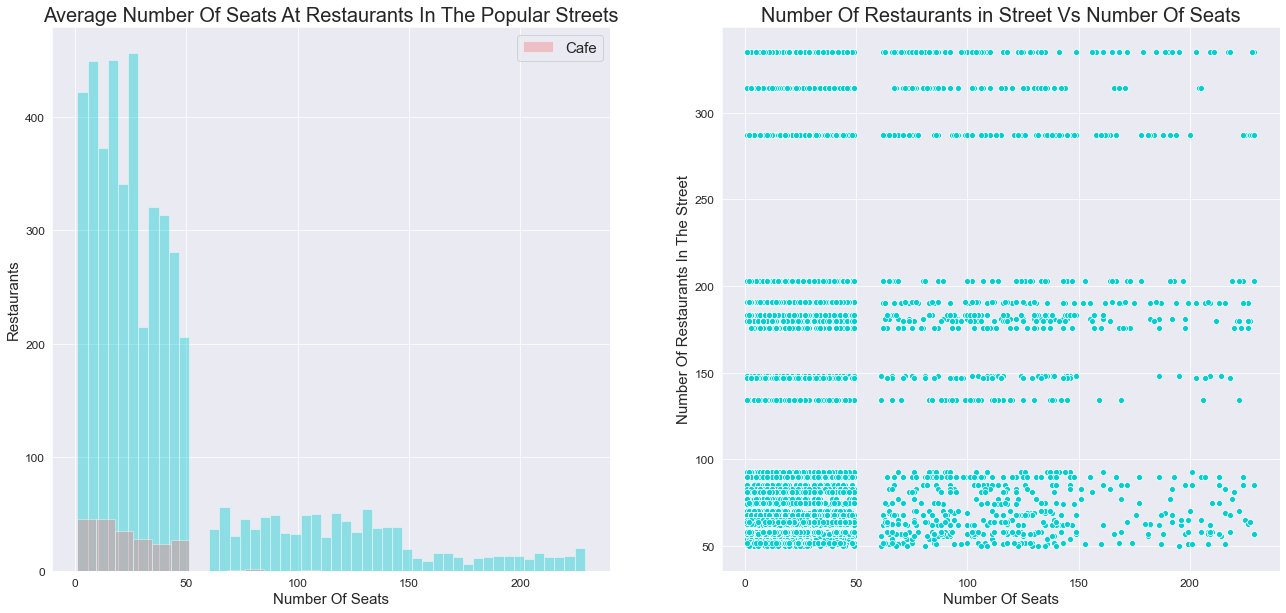

In [59]:
plt.figure(figsize=(22, 10))
sns.set_style('darkgrid')

plt.subplot(121)
ax=sns.distplot(pop_street_data['number'],kde=False,color=colors[0])
ax=sns.distplot(pop_street_data_cafe['number'],kde=False,color=colors[1],label='Cafe')

plt.title('Average Number Of Seats At Restaurants In The Popular Streets',fontdict={'size':20})    
plt.ylabel("Restaurants",fontdict={'size':15})
plt.xlabel("Number Of Seats",fontdict={'size':15})
ax.tick_params(axis='both', which='major', labelsize=12)

plt.legend(fontsize=15)

plt.subplot(122)
ax=sns.scatterplot(data=pop_street_data_, x='number', y='number_of_places',color=colors[0])
plt.title('Number Of Restaurants in Street Vs Number Of Seats',fontdict={'size':20})    
plt.ylabel("Number Of Restaurants In The Street",fontdict={'size':15})
plt.xlabel("Number Of Seats",fontdict={'size':15})
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

We can see that there are a lot of restaurants with up to 50 seats in popular streets.

We can see that cafes take a small part of the places on the most popular streets.

In the "Number Of Restaurants in Street Vs Number Of Seats" graph we can see that the most populated block is up to 50 seats in a street with up to 100 restaurants. After that we can see a block between 60 and 150 seats in a street with up to 100 restaurants.

55 is not a popular number of seats for a restaurant, neither is 51.

## Conclution
<a class="anchor" id="chapter3"></a>

In this project we looked at restaurants in LA, We saw that only 2.9% of places are considered as a ‘Cafe’ the huge majority of places are ‘restaurant’ type, 61.9% of all places are considered ‘non chains’.  And out of these ‘non chains’ only 2.8% are a ‘cafe’ and 3.2% of chains are a ‘cafe’.

Usually chains dont have a large number of branches, average number is 1.3 branches per chain. But they do have a relatively large number of seats averaging at 41.4.
Cafes have a relatively low number of seats averaging 25, Which is second to last from all the other types of places only more than bakeries. 

There are three main streets that seem to be the most popular for places to open. And there have more than a third of all the places. On the streets with more than 50 places, These places seem mostly to have not more that 50 seats.

From all of this data we can say that the most common place in LA is a non chain restaurant on a street with up to 100 other places and with up to 50 seats.

From the data we can see that when we look at non chains there are no bakeries at all, we could consider, on top of the coffee maybe getting into the baking slot, That would get us a bit more uniqueness even after the robot novelty will fade.



Market wise we can see that there is place in the market for more chains, seeing that most places are non chain and when it gets to coffe people can be very loyal, If they like us we could spread because relatively there is not a big number of caffe places.


In the big picture, Wherever people want food, They want coffee as well. There is an untapped market becouse there is a relatively low number of caffes when you look at the overall number of places. The cafe is a place where we could have potential to grow.